# In Class Exercise 7.6 - Solutions for Problems 1 and 2
We are going practice integrating what we have learned this semester. This exercise will help you practice thinking about problems and coding solutions. 
We do not expect you to complete all of this in a single class period, however, we would like you to complete as much of it as you can and submit your code at the end of the class period.

## Imports and Dataframe

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# For slightly nicer charts
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 150
sns.set(style="ticks")

***
## Washington Post Unsolved Homicides
The dataset title `'homicide-revised.csv'` is adapted from a dataset developed by the Washington Post for [this article](https://www.washingtonpost.com/graphics/2018/investigations/where-murders-go-unsolved/?noredirect=on&utm_term=.e03c4dc31643) that examined unsolved homicides in the United States. 

***
### Problem 1
* The `'victim_age'` column contains a mix of integers and words. Write code that uses the `map()` function to create a new `'age'` column that only contains the integers. For a reminder of how `map()` works, an example has been included at the bottom of this notebook.
* Find the three cities with the youngest victims on average and the three cities with the oldest victims on average.

In [4]:
# read the data file
df = pd.read_csv('homicide-revised.csv') 

# a function to create a new series labelled 'age' that excludes 'Unknown' and converts strings to integers
def remove_unknown(age_str):
    if age_str == 'Unknown':
        return None
    else:
        return int(age_str)

# create a new series (column) in the data frame using .map
df['age'] = df['victim_age'].map(remove_unknown)

# check to make sure it worked
df.head(12)

,victim_race,victim_age,victim_sex,city,state,disposition,year,age
0,Hispanic,78,Male,Albuquerque,NM,Closed without arrest,2010,78.0
1,Hispanic,17,Male,Albuquerque,NM,Closed by arrest,2010,17.0
2,White,15,Female,Albuquerque,NM,Closed without arrest,2010,15.0
3,Hispanic,32,Male,Albuquerque,NM,Closed by arrest,2010,32.0
4,White,72,Female,Albuquerque,NM,Closed without arrest,2010,72.0
5,White,91,Female,Albuquerque,NM,Open/No arrest,2010,91.0
6,Hispanic,52,Male,Albuquerque,NM,Closed by arrest,2010,52.0
7,Hispanic,52,Female,Albuquerque,NM,Closed by arrest,2010,52.0
8,White,56,Male,Albuquerque,NM,Open/No arrest,2010,56.0
9,Hispanic,43,Male,Albuquerque,NM,Open/No arrest,2010,43.0


Now we've turned the ages into integers and replaced `'Unknown'` with nothing which Pandas treats as `NaN` for 'Not a Number'. Let's try to calculate some means.

In [5]:
# find the three cities with the youngest average age
print('Youngest Average:')
print(df.groupby(by='city')['age'].mean().sort_values().head(3))

print()

# find the three cities with the oldest average age
print('Oldest Average:')
print(df.groupby(by='city')['age'].mean().sort_values().tail(5))

Youngest Average:
city
Boston        28.385993
Chicago       28.545126
Pittsburgh    29.550079
Name: age, dtype: float64

Oldest Average:
city
Albuquerque    35.182663
Las Vegas      35.433990
San Diego      36.707965
Dallas               NaN
Phoenix              NaN
Name: age, dtype: float64


Notice that Dallas and Phoenix both have NaN values. That should get your attention. We know there were some NaN values in Albuquerque and yet mean still returns an average for Albuquerque. 

Use your coding tools to look at the data and see if you can figure out how Dallas and Phoenix are different. Try not to just scroll through the whole dataset manually. Its huge, and won't help you practice thinking about coding.

In [12]:
# why do Dallas and Phoenix return NaN when we use groupby and mean?

df_dallas = df.query('city == "Dallas"')
print('Unique age values for Dallas:', df_dallas['age'].unique())

df_phnx = df.query('city == "Phoenix"')
print('Unique age values for Phoenix:', df_phnx['age'].unique())

df_alb = df.query('city == "Albuquerque"')
print('Unique age values for Albuquerque:', df_alb['age'].unique())

# because Dallas and Phoenix have no age values at all

Unique age values for Dallas: [nan]
Unique age values for Phoenix: [nan]
Unique age values for Albuquerque: [78. 17. 15. 32. 72. 91. 52. 56. 43. 20. nan 46. 16. 54. 22. 49. 25. 47.
 88. 27. 36.  1. 58. 42. 50.  3. 21. 19. 95. 24. 41. 51. 18.  8. 64. 30.
  2. 39. 45. 31.  0. 23. 28. 35. 26. 40. 94. 33. 57. 55. 29. 53. 66.  5.
 74. 69. 37. 59. 34. 38. 44. 14.  9. 65. 90. 48. 62. 60.  4. 70. 10. 11.
 63.  6. 73.]


So let's say you looked at your data in detail and you decide to drop any rows where the age is NaN. Using the tools we have so far, how could we do this? One way would be to use `.query()`.

In [13]:
df_nan_removed = df.query('age > -1 and age < 999')
print(df_nan_removed.groupby(by='city')['age'].mean().sort_values().tail(5))

city
Denver         34.573718
New York       34.685805
Albuquerque    35.182663
Las Vegas      35.433990
San Diego      36.707965
Name: age, dtype: float64


***
### Problem 2
Write a program that allows a user to select two separate cities and then compares those two city's rates of solved and unsolved homicides using a single visualization. Note! The rate here refers to the percentage of total homicides that are solved or unsolved. 

Your program must include the following:
* Instructions that include the valid city names the user can select. Do not 'hard code' in the cities. Your program must find the unique city names from the dataset and include them in the instructions for the user.
* A function called `ask_city` that asks for the user to input a city, checks to make sure the input is a valid city listed in the dataset, prompts for another entry if it is not, and returns the valid city name.
* A new column in the dataframe called `'outcome'`, that has the value 'Solved' if the disposition of the case is 'Closed by arrest', and 'Unsolved' if not

Hints:
* Try picking two cities of your own choice first, and create the visualization for those two cities, once that works, turn the code into function that would work for any two cities
* Once you have a visualization function that you can pass two cities into, work on the `ask_city` function. You can call it twice to get what you need for the visualization.
* Remember the tolist() function is handy for converting objects into lists... 
* Bonus challenge, if your user enters the same city twice, make them re-enter their selections


Data is available from these cities:
['Albuquerque', 'Atlanta', 'Baltimore', 'Baton Rouge', 'Birmingham', 'Boston', 'Buffalo', 'Charlotte', 'Chicago', 'Cincinnati', 'Columbus', 'Dallas', 'Denver', 'Detroit', 'Durham', 'Fort Worth', 'Fresno', 'Houston', 'Indianapolis', 'Jacksonville', 'Kansas City', 'Las Vegas', 'Long Beach', 'Los Angeles', 'Louisville', 'Memphis', 'Miami', 'Milwaukee', 'Minneapolis', 'Nashville', 'New Orleans', 'New York', 'Oakland', 'Oklahoma City', 'Omaha', 'Philadelphia', 'Phoenix', 'Pittsburgh', 'Richmond', 'San Antonio', 'Sacramento', 'Savannah', 'San Bernardino', 'San Diego', 'San Francisco', 'St. Louis', 'Stockton', 'Tampa', 'Tulsa', 'Washington']


Please enter a valid city: Atlanta
Please enter a valid city: Baltimore


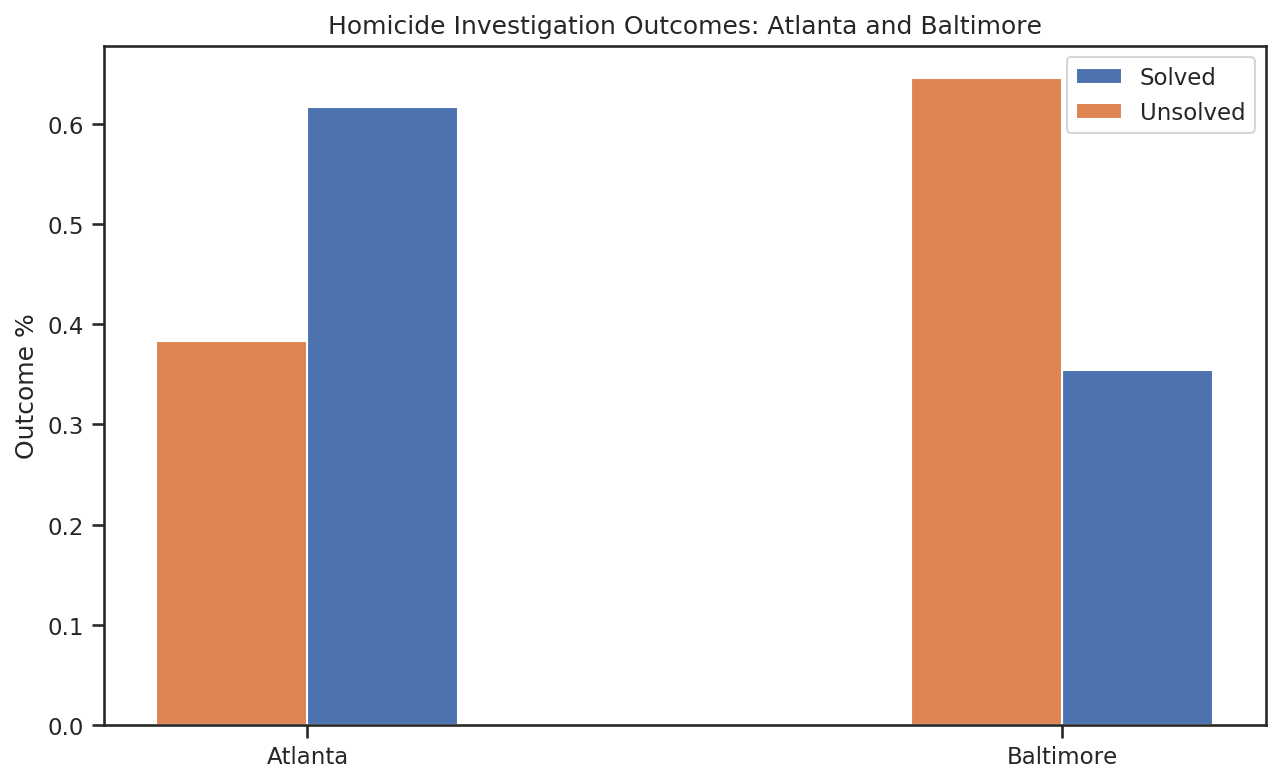

In [14]:
# assign disposition status to solved or unsolved outcome
def case_status(status):
    if status == 'Closed by arrest':
        return 'Solved'
    else:
        return 'Unsolved'

    
# create a new series (column) that classfies casses as solved or unsolved
df['Outcome'] = df['disposition'].map(case_status)


# find the unique city values and then make them into a list
city_list = df['city'].unique().tolist()


# ask for cities until an entry matches the cities in city_list
def ask_city():
    while True: 
        city_selection = input('Please enter a valid city:')
        if city_selection in city_list:
            return city_selection
        else:
            print('That is not a valid city. Please try again.')

            
# print the cities avaliable to choose from            
print('Data is available from these cities:')
print(city_list)


# ask for the user to provide cities
city1 = ask_city()
city2 = ask_city()


# bonus challenge, check for duplicate city and ask again if needed
def city_check(c1, c2):
    while c1 == c2:
        print('You entered the same city twice. Please try again')
        c2 = ask_city()
    return c2

city2 = city_check(city1, city2)    


# we can select a subset of the data by using query and string formatting
df_selected_cities = df.query("city == '{}' or city == '{}'".format(city1, city2))


# or we can select a subset of the data by using query and the @ symbol to insert a variable into the string
df_selected_cities = df.query('city == @city1 or city == @city2')


# we can get the rate (%) by using crosstabs
df_percent = pd.crosstab(df_selected_cities['city'], df_selected_cities['Outcome'], normalize = 'index')


# to make it easier to plot the crosstab we will reset the index to make 'city' easier to work with
df_percent = df_percent.reset_index()


# use matplotlib to make the bar charts, note the addition of width and align, if these are not included
# matplotlib will display the bars over one another
plt.bar(x = 'city' , height = 'Solved' , width = 0.2 , data = df_percent, align = 'edge')
plt.bar(x = 'city' , height = 'Unsolved' , width = -0.2, data = df_percent, align = 'edge')
plt.ylabel('Outcome %')
plt.legend(['Solved','Unsolved'])
plt.title('Homicide Investigation Outcomes: {} and {}'.format(city1, city2))
plt.show()

***
### Problem 3 
Write a program that allows a user to select one valid city. The program will then determine what other two cities are most similar in terms of the total number of homicides. The program will then produce a visualization comparing the three cities rates of solved and unsolved homicides using a single visualization.


Note! The rate here refers to the percentage of total homicides that are solved or unsolved. 

In [ ]:
# write and test your code here

***
### Problem 4
Use descriptive statistics and visualizations to compares the rates of solved and unsolved homicides as a function of victims age (ignore locations, just look at age)

In [ ]:
# write and test your code here

***
### Problem 5
Use descriptive statistics and visualizations to explore the role of ethnicity, sex, age, and year in homicide investigations in Chicago. 

In [ ]:
# write and test your code here

***
### Example: Using Map

In [ ]:
df_grads = pd.read_csv('recent-grads.csv')

def get_major_length(major):
    major_length = len(major)
    return major_length

df_grads['Major_Length'] = df_grads['Major'].map(get_major_length)